In [26]:
!pip install rasterio opencv-python-headless geopandas folium  rasterstats numpy scikit-learn matplotlib tensorflow

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 2.4/390.3 MB 11.2 MB/s eta 0:00:35
   ---------------------------------------- 4.7/390.3 MB 11.4 MB/s eta 0:00:34
    --------------------------------------- 7.1/390.3 MB 11.5 MB/s eta 0:00:34
    --------------------------------------- 9.4/390.3 MB 11.5 MB/s eta 0:00:34
   - -------------------------------------- 11.8/390.3 MB 11.5 MB/s eta 0:00:33
   - -------------------------------------- 14.2/390.3 MB 11.7 MB/s eta 0:00:33
   - -------------------------------------- 16.5/390.3 MB 11.7 MB/s eta 0:00:32
   - -------------------------------------- 18.9/390.3 MB 11.7 MB/s eta 0:00:32
   -- ------------------------------------- 21.2/390.3 MB 11.7 MB/s eta 0:00:32
   -- ------------------------------------- 23.6/390.3 MB 11.7 MB/s eta 0:00:32
   -- ------------------------------------- 26.0/390.3 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.windows import Window
import pandas as pd
import geopandas as gpd
from pylab import rcParams
import matplotlib
rcParams['figure.figsize'] = 18, 16
from sklearn.model_selection import train_test_split
from rasterio.plot import show
from shapely.geometry import box
import seaborn as sns


In [7]:
path_img = 'resources/solo_test/AOI_img.tif'
path_classe1 = 'resources/solo_test/Solo.shp'
path_classe2 = 'resources/solo_test/Veg.shp'
path_classe3 = 'resources/solo_test/Invasoras.shp'

In [8]:
gdf1 = gpd.read_file(path_classe1)
gdf2 = gpd.read_file(path_classe2)
gdf3 = gpd.read_file(path_classe3)

<Axes: >

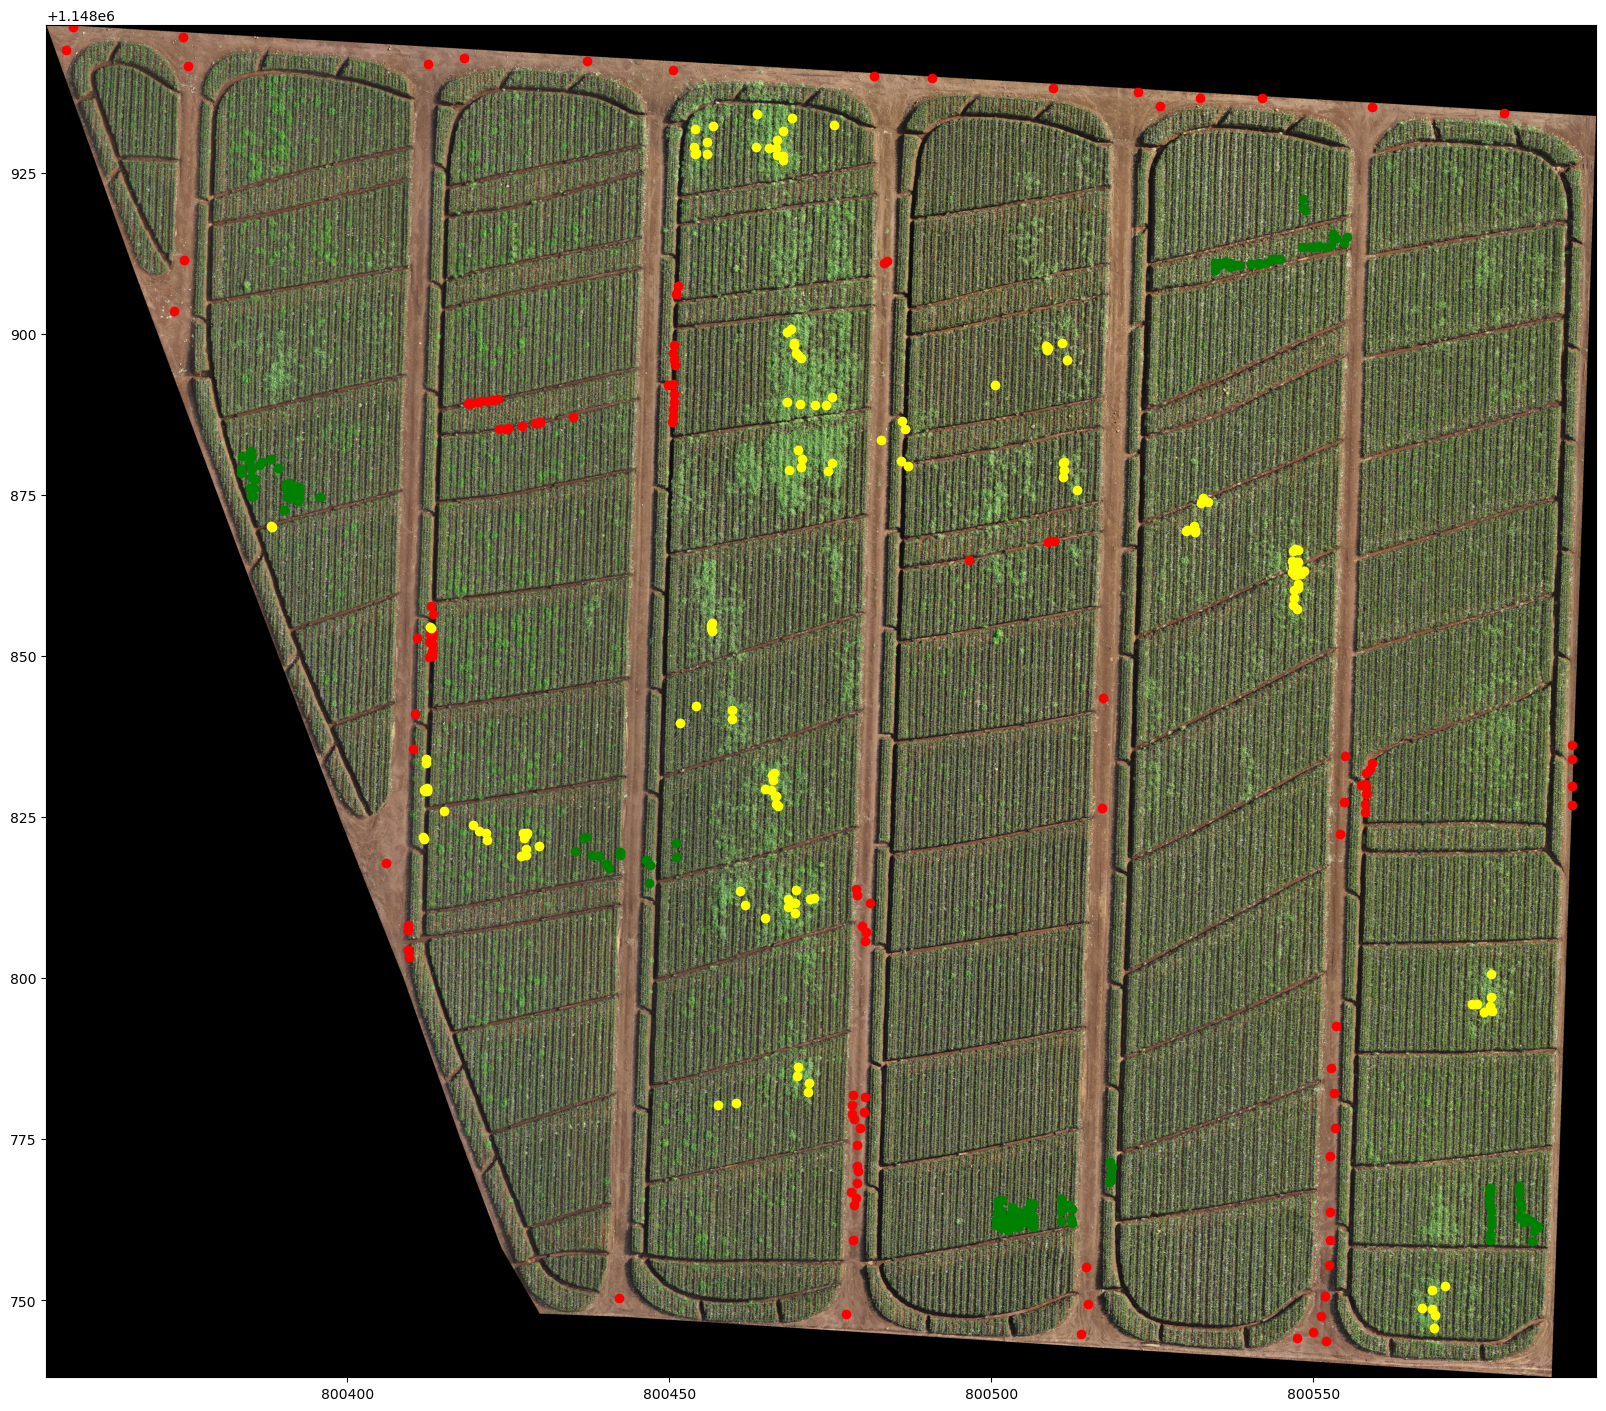

In [9]:
fig, ax = plt.subplots(figsize=(20, 20))
with rasterio.open(path_img) as src:
    gdf1 = gdf1.to_crs(src.crs.to_dict())
    gdf2 = gdf2.to_crs(src.crs.to_dict())
    gdf3 = gdf3.to_crs(src.crs.to_dict())
    show(src,ax=ax)
gdf1.plot(ax=ax, color='red')
gdf2.plot(ax=ax, color='green')
gdf3.plot(ax=ax, color='yellow')

In [10]:
gdf1['id'] = 0
gdf2['id'] = 1
gdf3['id'] = 2

In [11]:
gdf = pd.concat([gdf1,gdf2,gdf3], axis=0)

In [12]:
gdf

id                        geometry
0     0  POINT (800522.754 1148937.597)
1     0  POINT (800541.974 1148936.659)
2     0  POINT (800559.084 1148935.253)
3     0  POINT (800579.593 1148934.315)
4     0  POINT (800509.628 1148938.182)
..   ..                             ...
147   2  POINT (800469.285 1148898.636)
148   2  POINT (800469.285 1148898.375)
149   2  POINT (800469.629 1148897.139)
150   2   POINT (800470.038 1148896.72)
151   2  POINT (800470.503 1148896.274)

[431 rows x 2 columns]

In [13]:
coord_list = [(x, y) for x, y in zip(gdf.geometry.x, gdf.geometry.y)]

In [14]:
Values_list = []
Column_list = []
with rasterio.open(path_img) as src:
  Values = [x for x in src.sample(coord_list)]
  Values_list.append(Values)

In [15]:
X = np.array(Values_list)
X = X[0].copy()
X = X[:,0:3].copy()

In [16]:
X.shape

(431, 3)

In [17]:
Y = gdf['id'].values
Y = Y[:,np.newaxis]

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix

In [19]:
enc = OneHotEncoder()

enc.fit(Y)

Y = enc.transform(Y).toarray()

In [20]:
Y.shape

(431, 3)

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [22]:
input_shape = (X_train.shape[1:])
num_classes = len(np.unique(gdf['id'].values))

In [23]:
input_shape

(3,)

In [24]:
num_classes

3

CONTRUÇÃO DA REDE NEURAL


In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense